<a href="https://colab.research.google.com/github/lauramendescd/sinasc-analise/blob/main/data_cleaning_Laura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas e Inicialização BigQuery**

In [ ]:
# Bibliotecas necessárias
import os
from google.colab import drive
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Definindo o caminho para o arquivo de credenciais no Google Colab
path_to_credentials = '/content/projeto-iii-425700-4b6d9ee58aae.json'

# Definindo a variável de ambiente para as credenciais do Google Cloud
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path_to_credentials

# Inicializando o cliente do BigQuery
client = bigquery.Client()

# Consulta SQL para selecionar todas as colunas dos dados do SINASC do estado do Ceará a partir de 2014
query = """
SELECT *
FROM `basedosdados.br_ms_sinasc.microdados`
WHERE EXTRACT(YEAR FROM data_nascimento) >= 2013
AND sigla_uf = 'CE'
"""

# Executar a consulta
query_job = client.query(query)

# Obtendo os resultados em um DataFrame do Pandas
df = query_job.to_dataframe()
df


,ano,sigla_uf,sequencial_nascimento,id_municipio_nascimento,local_nascimento,codigo_estabelecimento,data_nascimento,hora_nascimento,sexo,peso,...,data_recebimento,data_recebimento_original,diferenca_data,data_declaracao,funcao_responsavel,documento_responsavel,formacao_profissional_responsavel,status_dn,status_dn_nova,paridade
0,2014,CE,128485,2400505,1,2407566,2014-08-28,11:02:00,F,2715,...,2014-09-05,NaT,8,2014-08-28,2,4,1,0,0,1
1,2014,CE,105674,2305902,1,2414872,2014-10-01,13:20:00,F,3400,...,2014-11-07,NaT,37,2014-10-01,2,3,1,0,0,1
2,2014,CE,108727,2307106,1,2425599,2014-09-03,14:35:00,M,3500,...,2015-04-30,NaT,239,2014-09-03,2,3,1,0,0,1
3,2014,CE,60295,2312908,1,2426579,2014-05-08,16:28:00,M,3280,...,2014-06-11,NaT,34,2014-05-08,5,4,1,0,0,1
4,2014,CE,5959,2302503,1,2480646,2014-04-04,11:25:00,F,3410,...,2014-06-04,NaT,61,2014-04-04,2,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296568,2013,CE,91729,2304400,1,7047428,2013-08-30,11:20:00,1,2980,...,NaT,NaT,0,NaT,None,None,1,0,1,None
1296569,2013,CE,120076,2304400,1,7047428,2013-11-03,20:18:00,1,3240,...,NaT,NaT,0,NaT,None,None,1,0,1,None
1296570,2013,CE,114249,2304400,1,7047428,2013-11-24,21:52:00,1,3485,...,NaT,NaT,0,NaT,None,None,1,0,1,None
1296571,2013,CE,80314,2304400,1,7047428,2013-07-15,06:40:00,2,3445,...,NaT,NaT,0,NaT,None,None,1,0,1,None


# **Limpeza dos dados e Transformação das Variáveis**

###Variável: GRAVIDEZ

In [ ]:
# Limpeza e transformação das variáveis
# Variável gravidez
print(df['tipo_gravidez'].value_counts(dropna=False))

# Substituir valores faltantes
df['tipo_gravidez'] = df['tipo_gravidez'].replace(np.nan, "9")
print(df['tipo_gravidez'].value_counts(dropna=False))

# Convertendo a variável gravidez para numérica
df['tipo_gravidez'] = df['tipo_gravidez'].astype(int)

# Definindo os rótulos
gravidez_label = {1: "Única", 2: "Dupla", 3: "Tripla +", 9: "Ignorado"}
df['tipo_gravidez_label'] = df['tipo_gravidez'].map(gravidez_label)

print(df['tipo_gravidez_label'].value_counts(dropna=False))


tipo_gravidez
1       1262276
2         23760
None       9922
3           595
9            20
Name: count, dtype: int64
tipo_gravidez
1    1262276
2      23760
9       9942
3        595
Name: count, dtype: int64
tipo_gravidez_label
Única       1262276
Dupla         23760
Ignorado       9942
Tripla +        595
Name: count, dtype: int64



### Var Texto ~ Var Numéricas



In [ ]:
# Transformar várias variáveis tipo texto em tipo numérico
cols_to_convert = ['semana_gestacao', 'tipo_parto', 'peso', 'apgar1', 'apgar5',
                   'escolaridade_mae', 'pre_natal', 'sexo', 'local_nascimento',
                   'raca_cor', 'id_anomalia']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


### Semana de Gestação

In [ ]:
# Semana de gestação
df['semana_gestacao'] = df['semana_gestacao'].fillna(9)
gestacao_label = {1: "<22s", 2: "22-27s", 3: "28-31s", 4: "32-36s", 5: "37-41s", 6: "42s +", 9: "Ign."}
df['semana_gestacao_label'] = df['semana_gestacao'].map(gestacao_label)

### Sexo

In [ ]:
# Sexo
sexo_label = {0: "Ign.", 1: "Masc", 2: "Fem"}
df['sexo_label'] = df['sexo'].map(sexo_label)

### Escolaridade da Mãe

In [ ]:
# Escolaridade da mãe
df['escolaridade_mae'] = df['escolaridade_mae'].fillna(9)
escmae_label = {1: "Nenhuma", 2: "1-3anos", 3: "4-7anos", 4: "8-11anos", 5: "12anos +", 9: "Ign."}
df['escolaridade_mae_label'] = df['escolaridade_mae'].map(escmae_label)

### Tipo de Parto

In [ ]:
# Tipo de parto
df['tipo_parto'] = df['tipo_parto'].fillna(9)
parto_label = {9: "Ign.", 1: "Vaginal", 2: "Cesáreo"}
df['tipo_parto_label'] = df['tipo_parto'].map(parto_label)

### Anomalia Congênita

In [ ]:
# Variável anomalia congênita
idanomal_label = {1: "Sim", 0: "Não"}

df['id_anomalia'] = df['id_anomalia'].replace(2, 0).replace(9, np.nan)
df['id_anomalia_label'] = df['id_anomalia'].map(idanomal_label)

### Histograma do Peso

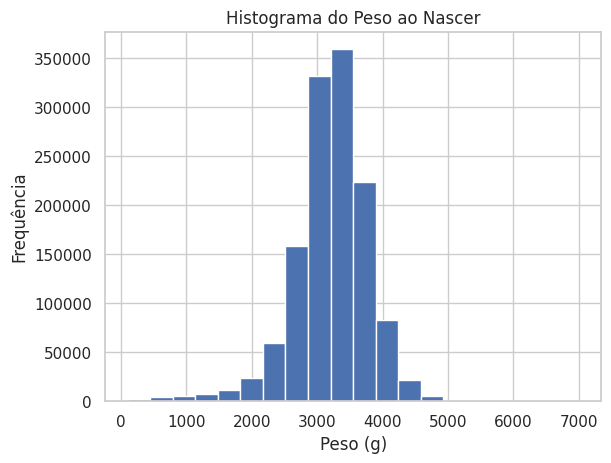

In [ ]:
# Gerar histograma da variável peso
plt.hist(df['peso'].dropna(), bins=20)
plt.title('Histograma do Peso ao Nascer')
plt.xlabel('Peso (g)')
plt.ylabel('Frequência')
plt.show()


### Baixo Peso e Pretermo

In [ ]:
# Gerar variável baixo_peso < 2500g
df['baixo_peso'] = df['peso'] < 2500
df['baixo_peso'] = df['baixo_peso'].map({True: 1, False: 0})

# Gerar variável pretermo < 37 semanas
df['pretermo'] = df['semana_gestacao'] < 5
df.loc[(df['pretermo'] == 0) & (df['semana_gestacao'] == 9), 'pretermo'] = np.nan #(REVER)

# Colocar rótulo em baixo_peso e pretermo
df['baixo_peso_label'] = df['baixo_peso'].map({1: "Sim", 0: "Não"})
df['pretermo_label'] = df['pretermo'].map({1: "Sim", 0: "Não"})

### Apgar

In [ ]:
# Tranformar os valores 99 em faltantes
df['apgar1'] = df['apgar1'].replace(99, np.nan)
df['apgar5'] = df['apgar5'].replace(99, np.nan)

# Resumo de variáveis numéricas
print(df[['apgar1', 'apgar5']].describe())

          apgar1     apgar5
count  1278583.0  1278583.0
mean    8.164706   9.035429
std     1.158859    0.80168
min          0.0        0.0
25%          8.0        9.0
50%          8.0        9.0
75%          9.0        9.0
max         10.0       10.0


# **Tabela Cruzada | Semana de Gestação e Baixo Peso**

In [ ]:
# Tabelas cruzadas
gestacao_baixo_peso = pd.crosstab(df['semana_gestacao_label'], df['baixo_peso_label'], margins=True)
print(gestacao_baixo_peso)

# Verificação de inconsistências
inconsistencies = df[(df['baixo_peso'] == 0) & (df['semana_gestacao'] < 3)]
print(inconsistencies[['sequencial_nascimento', 'semana_gestacao', 'peso', 'baixo_peso', 'apgar1', 'apgar5']])

baixo_peso_label         Não   Sim    All
semana_gestacao_label                    
Ign.                   53041  3830  56871
All                    53041  3830  56871
Empty DataFrame
Columns: [sequencial_nascimento, semana_gestacao, peso, baixo_peso, apgar1, apgar5]
Index: []


In [ ]:
# Mostrar as primeiras linhas das novas variáveis criadas
new_vars = ['tipo_gravidez_label', 'semana_gestacao_label', 'sexo_label',
            'escolaridade_mae_label', 'tipo_parto_label', 'id_anomalia_label',
            'baixo_peso', 'baixo_peso_label', 'pretermo', 'pretermo_label']

print(df[new_vars].head())


  tipo_gravidez_label semana_gestacao_label sexo_label escolaridade_mae_label  \
0               Única                   NaN        NaN               8-11anos   
1               Única                   NaN        NaN               8-11anos   
2               Única                   NaN        NaN               8-11anos   
3               Única                   NaN        NaN               12anos +   
4               Dupla                   NaN        NaN               12anos +   

  tipo_parto_label id_anomalia_label  baixo_peso baixo_peso_label  pretermo  \
0          Cesáreo               Não         0.0              Não     False   
1          Cesáreo               Não         0.0              Não     False   
2          Cesáreo               Não         0.0              Não     False   
3          Cesáreo               Não         0.0              Não     False   
4          Cesáreo               Não         0.0              Não     False   

  pretermo_label  
0            NaN  


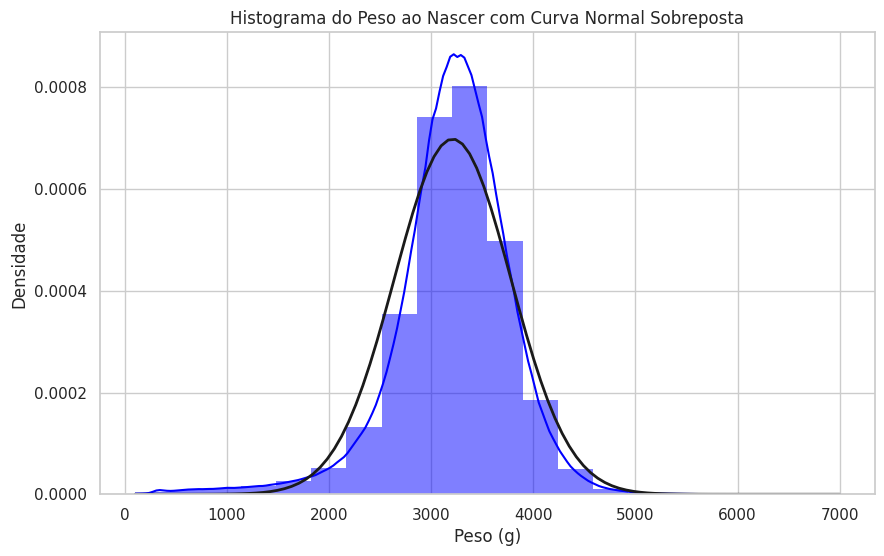

Resumo Estatístico do Peso ao Nascer:
count    1296526.0
mean     3209.4472
std      571.13784
min          100.0
25%         2928.0
50%         3250.0
75%         3556.0
max         7000.0
Name: peso, dtype: Float64


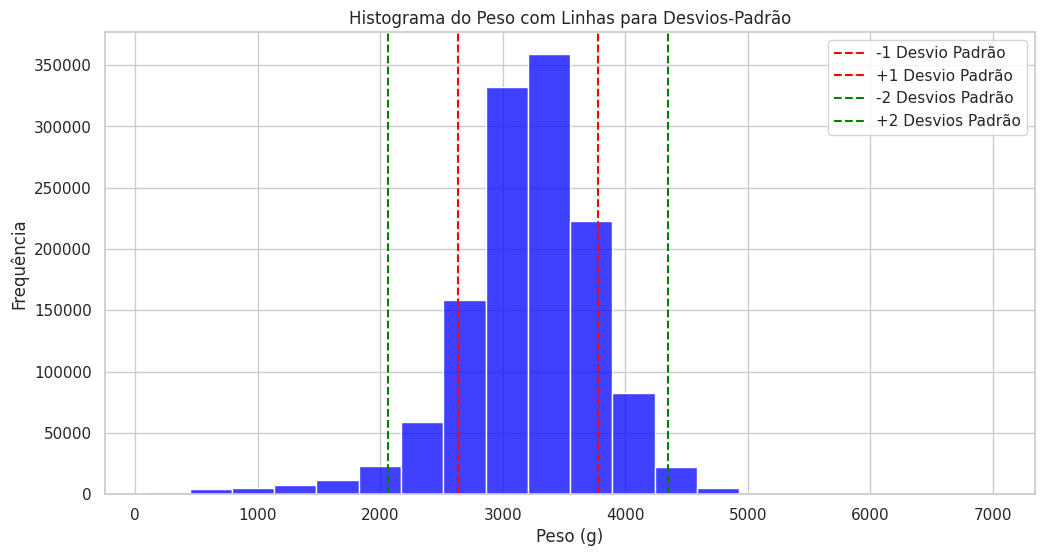

Resumo Estatístico do Peso ao Nascer por Sexo:
               count         mean          std    min      25%     50%  \
sexo_label                                                               
Fem         568724.0  3154.578957   557.037755  100.0   2880.0  3192.0   
Ign.           278.0   2446.23741  1025.882454  100.0  1814.25  2592.5   
Masc        598846.0  3261.625197   580.660419  100.0   2980.0  3300.0   

               75%     max  
sexo_label                  
Fem         3495.0  7000.0  
Ign.        3230.0  4160.0  
Masc        3615.0  7000.0  
Registros de RN de Peso >=2500g e Baixo Peso = 0:
    ano sigla_uf sequencial_nascimento id_municipio_nascimento  \
0  2014       CE                128485                 2400505   
1  2014       CE                105674                 2305902   
2  2014       CE                108727                 2307106   
3  2014       CE                 60295                 2312908   
4  2014       CE                  5959                 23

In [ ]:
import scipy.stats as stats

# **Histograma do Peso com Curva Normal Sobreposta**

# Definindo o gráfico
plt.figure(figsize=(10, 6))

# Plotando o histograma
sns.histplot(df['peso'].dropna(), bins=20, kde=True, color='blue', stat='density', linewidth=0)

# Ajustando os parâmetros da curva normal
mean, std = df['peso'].mean(), df['peso'].std()
xmin, xmax = df['peso'].min(), df['peso'].max()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)

# Adicionando a curva normal
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histograma do Peso ao Nascer com Curva Normal Sobreposta')
plt.xlabel('Peso (g)')
plt.ylabel('Densidade')
plt.show()

# **Resumo Estatístico do Peso**

# Resumo estatístico do peso
peso_stats = df['peso'].describe()
print("Resumo Estatístico do Peso ao Nascer:")
print(peso_stats)

# **Histogramas com Linhas Verticais para 1 e 2 Desvios-Padrão da Média**

plt.figure(figsize=(12, 6))

# Plotando o histograma
sns.histplot(df['peso'].dropna(), bins=20, color='blue', kde=False)

# Adicionando linhas verticais para 1 e 2 desvios-padrão
mean = df['peso'].mean()
std = df['peso'].std()
plt.axvline(mean - std, color='red', linestyle='--', label='-1 Desvio Padrão')
plt.axvline(mean + std, color='red', linestyle='--', label='+1 Desvio Padrão')
plt.axvline(mean - 2*std, color='green', linestyle='--', label='-2 Desvios Padrão')
plt.axvline(mean + 2*std, color='green', linestyle='--', label='+2 Desvios Padrão')

plt.title('Histograma do Peso com Linhas para Desvios-Padrão')
plt.xlabel('Peso (g)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# **Resumo Estatístico do Peso por Sexo**

# Resumo estatístico do peso por sexo
peso_sexo_stats = df.groupby('sexo_label')['peso'].describe()
print("Resumo Estatístico do Peso ao Nascer por Sexo:")
print(peso_sexo_stats)

# **Filtrar e Mostrar Registros de RN de Peso >=2500g e Baixo Peso = 0**

# Filtrar os registros
filtered_df = df[(df['peso'] >= 2500) & (df['baixo_peso'] == 0)]

# Remover a coluna 'gestacao_agr'
filtered_df = filtered_df.drop(columns=['gestacao_agr'], errors='ignore')

print("Registros de RN de Peso >=2500g e Baixo Peso = 0:")
print(filtered_df.head())

# **Exemplo de Amostragem Aleatória de 10%**

# Amostragem aleatória de 10%
sample_10pct = df.sample(frac=0.1, random_state=42)
print("Amostragem Aleatória de 10%:")
print(sample_10pct.head())

# **Análise de Médias com Intervalo de Confiança**

# Função para calcular intervalo de confiança
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    interval = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - interval, mean + interval

# Calculando o intervalo de confiança para o peso
mean, lower, upper = confidence_interval(df['peso'].dropna())
print(f"Intervalo de Confiança de 95% para o Peso ao Nascer: {lower:.2f} a {upper:.2f}")

# **Análise Específica de RN a Termo com Bom Apgar**

# Filtrar RN a termo e com bom Apgar (assumindo Apgar >= 7 como bom)
termo_bom_apgar = df[(df['semana_gestacao'] >= 5) & (df['apgar1'] >= 7) & (df['apgar5'] >= 7)]
print("Registros de RN a Termo com Bom Apgar:")
print(termo_bom_apgar.head())

# **Exemplo de Amostragem de 2002 Registros**

# Amostragem de 2002 registros
sample_2002 = df.sample(n=2002, random_state=42)
print("Amostragem de 2002 Registros:")
print(sample_2002.head())

# **Exemplo de Amostragem Reprodutível com 1% dos Registros**

# Amostragem reprodutível de 1%
sample_1pct = df.sample(frac=0.01, random_state=42)
print("Amostragem Reprodutível de 1% dos Registros:")
print(sample_1pct.head())


In [ ]:
print(df.columns)


Index(['ano', 'sigla_uf', 'sequencial_nascimento', 'id_municipio_nascimento',
       'local_nascimento', 'codigo_estabelecimento', 'data_nascimento',
       'hora_nascimento', 'sexo', 'peso', 'raca_cor', 'apgar1', 'apgar5',
       'id_anomalia', 'codigo_anomalia', 'semana_gestacao',
       'semana_gestacao_estimada', 'gestacao_agr', 'tipo_gravidez',
       'tipo_parto', 'inicio_pre_natal', 'pre_natal', 'pre_natal_agr',
       'classificacao_pre_natal', 'quantidade_filhos_vivos',
       'quantidade_filhos_mortos', 'id_pais_mae', 'id_uf_mae',
       'id_municipio_mae', 'id_pais_residencia', 'id_municipio_residencia',
       'data_nascimento_mae', 'idade_mae', 'escolaridade_mae',
       'serie_escolar_mae', 'escolaridade_2010_mae',
       'escolaridade_2010_agr_mae', 'estado_civil_mae', 'ocupacao_mae',
       'raca_cor_mae', 'gestacoes_ant', 'quantidade_parto_normal',
       'quantidade_parto_cesareo', 'data_ultima_menstruacao',
       'tipo_apresentacao', 'inducao_parto', 'cesarea_antes_

In [ ]:
# Verificar as colunas disponíveis no DataFrame
print(df.columns)


Index(['ano', 'sigla_uf', 'sequencial_nascimento', 'id_municipio_nascimento',
       'local_nascimento', 'codigo_estabelecimento', 'data_nascimento',
       'hora_nascimento', 'sexo', 'peso', 'raca_cor', 'apgar1', 'apgar5',
       'id_anomalia', 'codigo_anomalia', 'semana_gestacao',
       'semana_gestacao_estimada', 'gestacao_agr', 'tipo_gravidez',
       'tipo_parto', 'inicio_pre_natal', 'pre_natal', 'pre_natal_agr',
       'classificacao_pre_natal', 'quantidade_filhos_vivos',
       'quantidade_filhos_mortos', 'id_pais_mae', 'id_uf_mae',
       'id_municipio_mae', 'id_pais_residencia', 'id_municipio_residencia',
       'data_nascimento_mae', 'idade_mae', 'escolaridade_mae',
       'serie_escolar_mae', 'escolaridade_2010_mae',
       'escolaridade_2010_agr_mae', 'estado_civil_mae', 'ocupacao_mae',
       'raca_cor_mae', 'gestacoes_ant', 'quantidade_parto_normal',
       'quantidade_parto_cesareo', 'data_ultima_menstruacao',
       'tipo_apresentacao', 'inducao_parto', 'cesarea_antes_

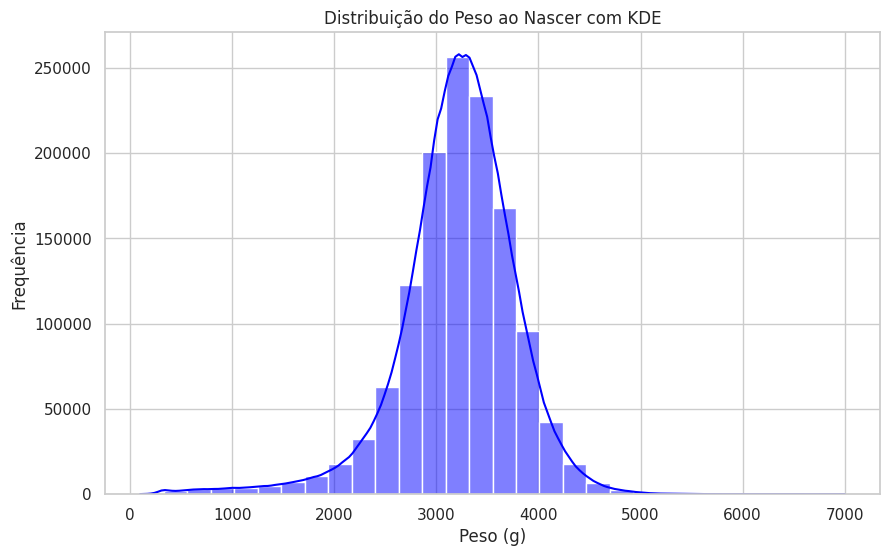

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você já tenha o DataFrame df com a coluna 'peso'
plt.figure(figsize=(10, 6))
sns.histplot(df['peso'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição do Peso ao Nascer com KDE')
plt.xlabel('Peso (g)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [ ]:
# Resumo estatístico do peso
summary_peso = df['peso'].describe()
summary_peso

,peso
count,1296526.0
mean,3209.4472
std,571.13784
min,100.0
25%,2928.0
50%,3250.0
75%,3556.0
max,7000.0


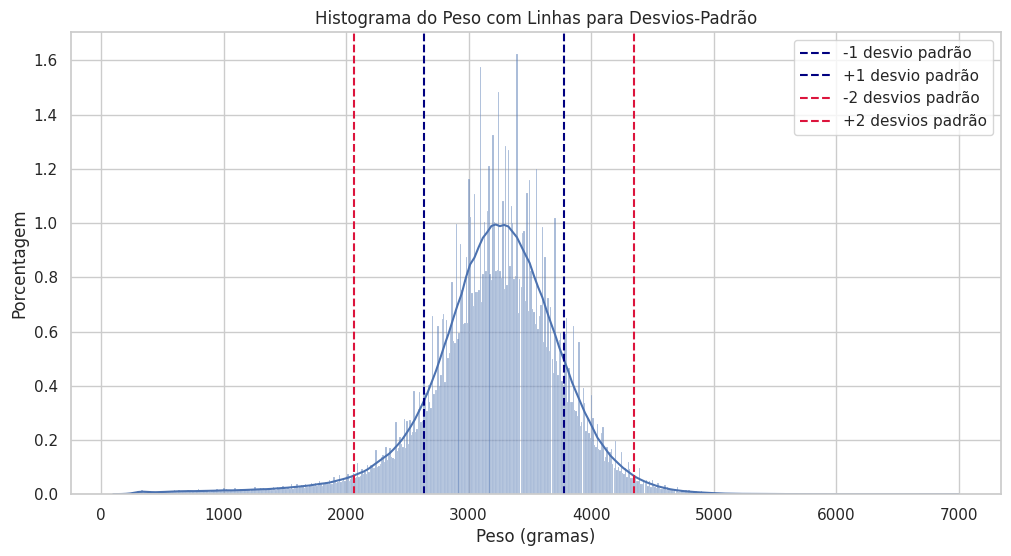

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['peso'], kde=True, stat='percent')

mean_peso = df['peso'].mean()
std_peso = df['peso'].std()

plt.axvline(mean_peso - std_peso, color='navy', linestyle='--', label='-1 desvio padrão')
plt.axvline(mean_peso + std_peso, color='navy', linestyle='--', label='+1 desvio padrão')
plt.axvline(mean_peso - 2 * std_peso, color='crimson', linestyle='--', label='-2 desvios padrão')
plt.axvline(mean_peso + 2 * std_peso, color='crimson', linestyle='--', label='+2 desvios padrão')

plt.title('Histograma do Peso com Linhas para Desvios-Padrão')
plt.xlabel('Peso (gramas)')
plt.ylabel('Porcentagem')
plt.legend()

# Adicionando anotações (opcional)
plt.annotate('-1 Desvio Padrão', xy=(mean_peso - std_peso, 10), xytext=(mean_peso - std_peso - 100, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('+1 Desvio Padrão', xy=(mean_peso + std_peso, 10), xytext=(mean_peso + std_peso + 100, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('-2 Desvios Padrão', xy=(mean_peso - 2 * std_peso, 5), xytext=(mean_peso - 2 * std_peso - 100, 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('+2 Desvios Padrão', xy=(mean_peso + 2 * std_peso, 5), xytext=(mean_peso + 2 * std_peso + 100, 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [ ]:
# Resumo estatístico do peso por sexo
resumo_peso_sexo = df.groupby('sexo_label')['peso'].describe()
print(resumo_peso_sexo)


               count         mean          std    min      25%     50%  \
sexo_label                                                               
Fem         568724.0  3154.578957   557.037755  100.0   2880.0  3192.0   
Ign.           278.0   2446.23741  1025.882454  100.0  1814.25  2592.5   
Masc        598846.0  3261.625197   580.660419  100.0   2980.0  3300.0   

               75%     max  
sexo_label                  
Fem         3495.0  7000.0  
Ign.        3230.0  4160.0  
Masc        3615.0  7000.0  


In [ ]:
df_novo = df.copy()  # Cria uma cópia completa do DataFrame com todas as alterações
df_novo

,ano,sigla_uf,sequencial_nascimento,id_municipio_nascimento,local_nascimento,codigo_estabelecimento,data_nascimento,hora_nascimento,sexo,peso,...,tipo_gravidez_label,semana_gestacao_label,sexo_label,escolaridade_mae_label,tipo_parto_label,id_anomalia_label,baixo_peso,pretermo,baixo_peso_label,pretermo_label
0,2014,CE,128485,2400505,1,2407566,2014-08-28,11:02:00,NaN,2715,...,Única,NaN,NaN,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
1,2014,CE,105674,2305902,1,2414872,2014-10-01,13:20:00,NaN,3400,...,Única,NaN,NaN,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
2,2014,CE,108727,2307106,1,2425599,2014-09-03,14:35:00,NaN,3500,...,Única,NaN,NaN,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
3,2014,CE,60295,2312908,1,2426579,2014-05-08,16:28:00,NaN,3280,...,Única,NaN,NaN,12anos +,Cesáreo,Não,0.0,False,Não,NaN
4,2014,CE,5959,2302503,1,2480646,2014-04-04,11:25:00,NaN,3410,...,Dupla,NaN,NaN,12anos +,Cesáreo,Não,0.0,False,Não,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296568,2013,CE,91729,2304400,1,7047428,2013-08-30,11:20:00,1.0,2980,...,Única,NaN,Masc,8-11anos,Cesáreo,NaN,0.0,False,Não,NaN
1296569,2013,CE,120076,2304400,1,7047428,2013-11-03,20:18:00,1.0,3240,...,Única,NaN,Masc,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
1296570,2013,CE,114249,2304400,1,7047428,2013-11-24,21:52:00,1.0,3485,...,Única,NaN,Masc,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
1296571,2013,CE,80314,2304400,1,7047428,2013-07-15,06:40:00,2.0,3445,...,Única,NaN,Fem,8-11anos,Vaginal,Não,0.0,False,Não,NaN


In [ ]:
df_novo.to_csv('dados_novo.csv', index=False)  # Salva o DataFrame como um arquivo CSV, sem o índice


In [ ]:
# Verificar as primeiras linhas do DataFrame
print(df_novo.head())

# Verificar informações gerais sobre o DataFrame
print(df_novo.info())

# Verificar estatísticas descritivas para variáveis numéricas
print(df_novo.describe())

# Verificar valores únicos de variáveis categóricas
for col in df_novo.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos em {col}:")
    print(df_novo[col].unique())

# Verificar se há valores faltantes
print(df_novo.isnull().sum())


    ano sigla_uf sequencial_nascimento id_municipio_nascimento  \
0  2014       CE                128485                 2400505   
1  2014       CE                105674                 2305902   
2  2014       CE                108727                 2307106   
3  2014       CE                 60295                 2312908   
4  2014       CE                  5959                 2302503   

   local_nascimento codigo_estabelecimento data_nascimento hora_nascimento  \
0                 1                2407566      2014-08-28        11:02:00   
1                 1                2414872      2014-10-01        13:20:00   
2                 1                2425599      2014-09-03        14:35:00   
3                 1                2426579      2014-05-08        16:28:00   
4                 1                2480646      2014-04-04        11:25:00   

   sexo  peso  ...  tipo_gravidez_label  semana_gestacao_label  sexo_label  \
0   NaN  2715  ...                Única                 

In [ ]:
import pandas as pd

# Supondo que df é o seu DataFrame
# Filtrando pelo código do município
resultado = df_novo[df_novo['id_municipio_nascimento'] == '2306306']

# Exibindo o resultado
print(resultado)


          ano sigla_uf sequencial_nascimento id_municipio_nascimento  \
1360     2014       CE                 41412                 2306306   
2257     2014       CE                105981                 2306306   
8171     2014       CE                106030                 2306306   
8172     2014       CE                 41664                 2306306   
8173     2014       CE                 41579                 2306306   
...       ...      ...                   ...                     ...   
1283416  2013       CE                 95405                 2306306   
1284207  2013       CE                 58479                 2306306   
1291888  2013       CE                 59141                 2306306   
1291889  2013       CE                 58985                 2306306   
1293092  2013       CE                 58502                 2306306   

         local_nascimento codigo_estabelecimento data_nascimento  \
1360                    1                2562154      2014-01-09   

In [ ]:
import pandas as pd

# Supondo que seu DataFrame original seja chamado 'df' e a coluna que indica a localidade seja chamada 'localidade'
# Filtrando os dados para incluir apenas Itapajé
df_itapaje = df_novo[df_novo['id_municipio_nascimento'] == '2306306']

# Salvando o DataFrame filtrado em um arquivo CSV
df_itapaje.to_csv('itapaje.csv', index=False)


In [ ]:
df_itapaje

,ano,sigla_uf,sequencial_nascimento,id_municipio_nascimento,local_nascimento,codigo_estabelecimento,data_nascimento,hora_nascimento,sexo,peso,...,tipo_gravidez_label,semana_gestacao_label,sexo_label,escolaridade_mae_label,tipo_parto_label,id_anomalia_label,baixo_peso,pretermo,baixo_peso_label,pretermo_label
16,2014,CE,41412,2306306,1,2562154,2014-01-09,16:21:00,NaN,2995,...,Única,NaN,NaN,4-7anos,Cesáreo,Não,0.0,False,Não,NaN
4112,2014,CE,41660,2306306,1,2562154,2014-05-21,16:40:00,NaN,3280,...,Única,NaN,NaN,8-11anos,Cesáreo,Não,0.0,False,Não,NaN
4113,2014,CE,106164,2306306,1,2562154,2014-12-07,14:00:00,NaN,3160,...,Única,NaN,NaN,4-7anos,Vaginal,Não,0.0,False,Não,NaN
4114,2014,CE,105921,2306306,1,2562154,2014-08-22,12:30:00,NaN,3950,...,Única,NaN,NaN,8-11anos,Vaginal,Não,0.0,False,Não,NaN
4115,2014,CE,106008,2306306,1,2562154,2014-09-24,05:00:00,NaN,2145,...,Única,NaN,NaN,1-3anos,Vaginal,Não,1.0,False,Sim,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287577,2013,CE,95397,2306306,1,2562154,2013-08-08,16:50:00,1.0,3440,...,Única,NaN,Masc,4-7anos,Cesáreo,Não,0.0,False,Não,NaN
1287578,2013,CE,58511,2306306,1,2562154,2013-03-07,17:15:00,2.0,3850,...,Única,NaN,Fem,4-7anos,Cesáreo,Não,0.0,False,Não,NaN
1288913,2013,CE,59126,2306306,1,4011325,2013-03-19,10:18:00,2.0,3100,...,Única,NaN,Fem,4-7anos,Cesáreo,Não,0.0,False,Não,NaN
1289356,2013,CE,59128,2306306,1,4011325,2013-03-25,12:10:00,1.0,3450,...,Única,NaN,Masc,4-7anos,Cesáreo,Não,0.0,False,Não,NaN


<ipython-input-29-089a91c59359>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_null_counts_itapaje.values, y=non_null_counts_itapaje.index, palette="mako")


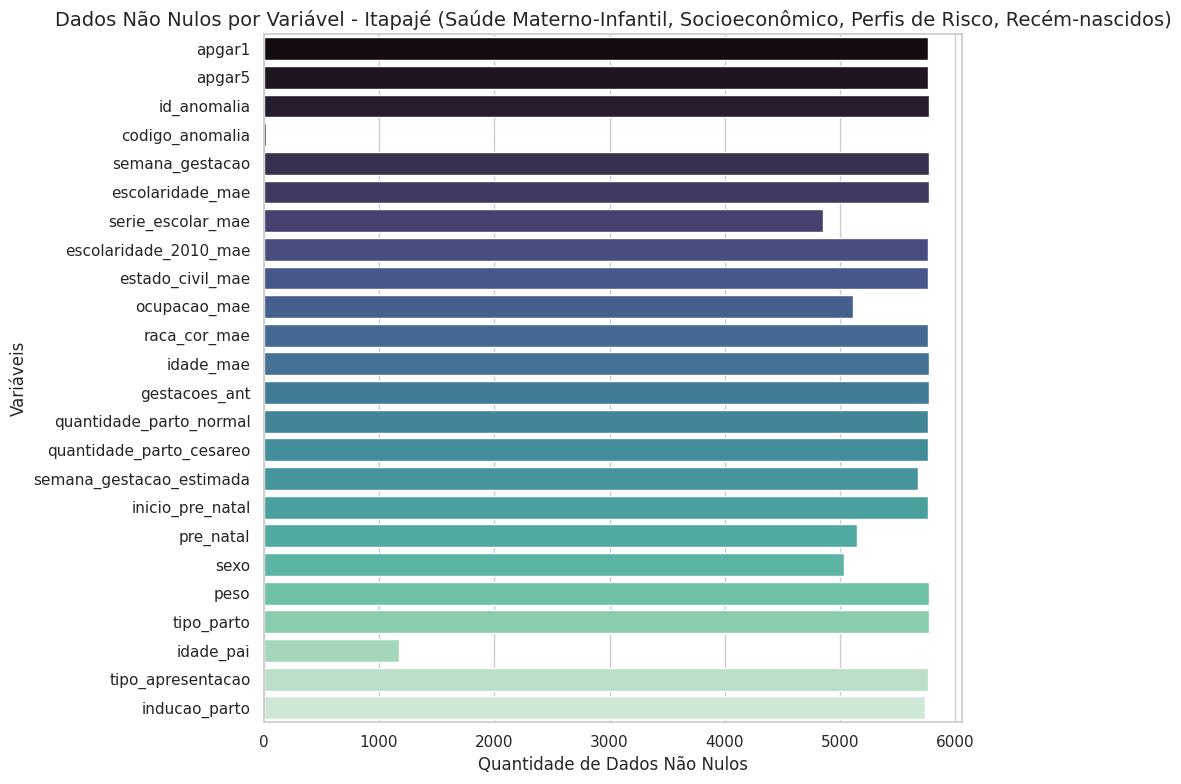

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Selecionando as colunas relacionadas aos tópicos solicitados
columns_to_analyze = [
    'apgar1', 'apgar5', 'id_anomalia', 'codigo_anomalia', 'semana_gestacao',  # Saúde Materno-Infantil
    'escolaridade_mae', 'serie_escolar_mae', 'escolaridade_2010_mae', 'estado_civil_mae', 'ocupacao_mae', 'raca_cor_mae',  # Impacto Socioeconômico
    'idade_mae', 'gestacoes_ant', 'quantidade_parto_normal', 'quantidade_parto_cesareo', 'semana_gestacao_estimada', 'inicio_pre_natal', 'pre_natal',  # Perfis de Risco Gestacional
    'sexo', 'peso', 'tipo_parto', 'idade_pai', 'tipo_apresentacao', 'inducao_parto'  # Características dos Recém-nascidos
]

# Calculando a quantidade de valores não nulos para essas colunas no município de Itapajé
non_null_counts_itapaje = df_itapaje[columns_to_analyze].notnull().sum()

# Configurando o estilo do gráfico
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Criando o gráfico de barras horizontais
sns.barplot(x=non_null_counts_itapaje.values, y=non_null_counts_itapaje.index, palette="mako")

# Adicionando rótulos e título
plt.xlabel("Quantidade de Dados Não Nulos", fontsize=12)
plt.ylabel("Variáveis", fontsize=12)
plt.title("Dados Não Nulos por Variável - Itapajé (Saúde Materno-Infantil, Socioeconômico, Perfis de Risco, Recém-nascidos)", fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()


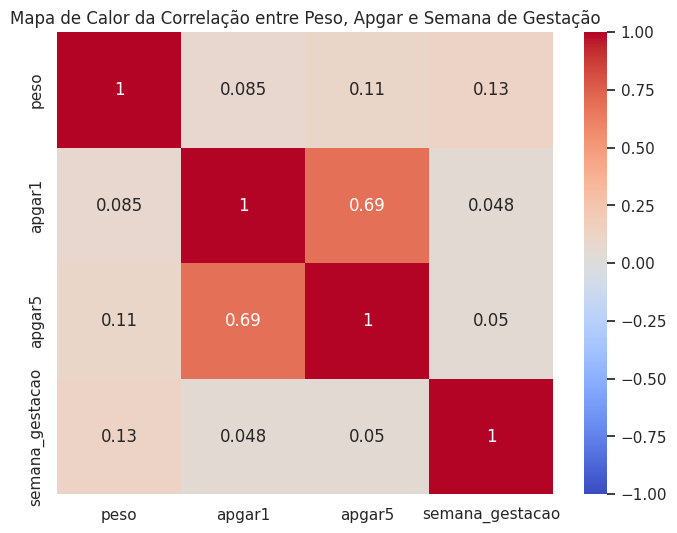

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha o DataFrame 'df' com as colunas desejadas
# Exemplo: df = pd.read_csv('seu_arquivo.csv')

# Selecionando as colunas numéricas relevantes para a análise de correlação
df_corr = df_itapaje[['peso', 'apgar1', 'apgar5', 'semana_gestacao']]

# Calculando a matriz de correlação
correlation_matrix = df_corr.corr()

# Criando o heatmap de correlação
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor da Correlação entre Peso, Apgar e Semana de Gestação')
plt.show()


In [ ]:
# Selecionar apenas as colunas numéricas
df_corr_numeric = df_corr.select_dtypes(include='number')

# Calculando a matriz de correlação
correlation_matrix = df_corr_numeric.corr()

# Exibindo a matriz de correlação
print("Matriz de Correlação entre as Variáveis Numéricas Selecionadas:")
print(correlation_matrix)


Matriz de Correlação entre as Variáveis Numéricas Selecionadas:
                            apgar1    apgar5  id_anomalia  semana_gestacao  \
apgar1                    1.000000  0.686261    -0.025772         0.047870   
apgar5                    0.686261  1.000000    -0.024399         0.049833   
id_anomalia              -0.025772 -0.024399     1.000000        -0.015768   
semana_gestacao           0.047870  0.049833    -0.015768         1.000000   
escolaridade_mae          0.034547  0.021912    -0.026686         0.005795   
idade_mae                 0.042907  0.041533     0.027996         0.003386   
gestacoes_ant             0.045807  0.054368     0.036839        -0.003743   
quantidade_parto_normal   0.034473  0.039275     0.042773         0.003475   
quantidade_parto_cesareo  0.036020  0.045014     0.006002        -0.025278   
pre_natal                 0.034072  0.004053    -0.019756         0.098026   
sexo                      0.030642  0.026482     0.005021         0.013373   


In [ ]:
# Selecionar as colunas de interesse
variaveis_interesse = df_itapaje[['idade_mae', 'gestacoes_ant', 'peso', 'apgar1', 'apgar5']]

# Calcular a matriz de correlação
correlation_matrix = variaveis_interesse.corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
               idade_mae  gestacoes_ant      peso    apgar1    apgar5
idade_mae       1.000000       0.507547  0.112197  0.042907  0.041533
gestacoes_ant   0.507547       1.000000  0.086076  0.045807  0.054368
peso            0.112197       0.086076  1.000000  0.085082  0.107196
apgar1          0.042907       0.045807  0.085082  1.000000  0.686261
apgar5          0.041533       0.054368  0.107196  0.686261  1.000000


<ipython-input-45-e71f7fafa9c4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itapaje_clean['cluster'] = kmeans.fit_predict(features_scaled)


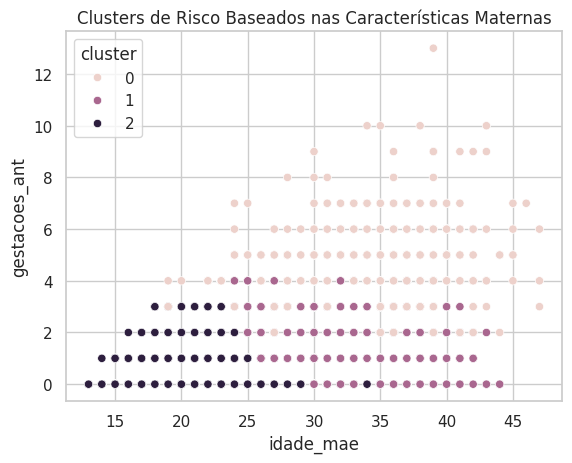

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione as características
features = df_itapaje[['escolaridade_mae', 'idade_mae', 'gestacoes_ant', 'pre_natal']]

# Remova linhas com valores ausentes do dataframe original
df_itapaje_clean = df_itapaje.dropna(subset=['escolaridade_mae', 'idade_mae', 'gestacoes_ant', 'pre_natal'])

# Selecione as características novamente do dataframe limpo
features_clean = df_itapaje_clean[['escolaridade_mae', 'idade_mae', 'gestacoes_ant', 'pre_natal']]

# Escale os dados
features_scaled = StandardScaler().fit_transform(features_clean)

# Execute o KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_itapaje_clean['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize os clusters
sns.scatterplot(x='idade_mae', y='gestacoes_ant', hue='cluster', data=df_itapaje_clean)
plt.title('Clusters de Risco Baseados nas Características Maternas')
plt.show()


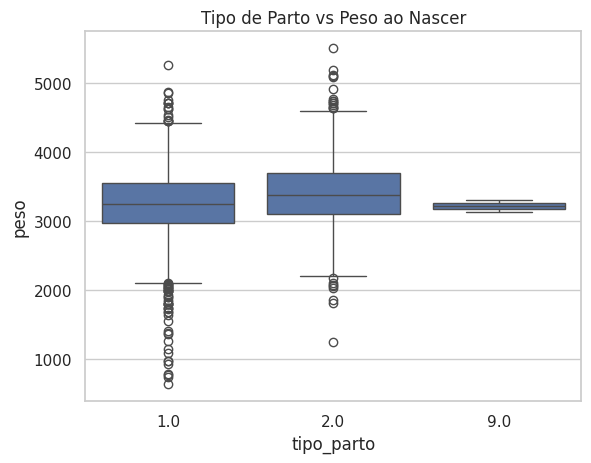

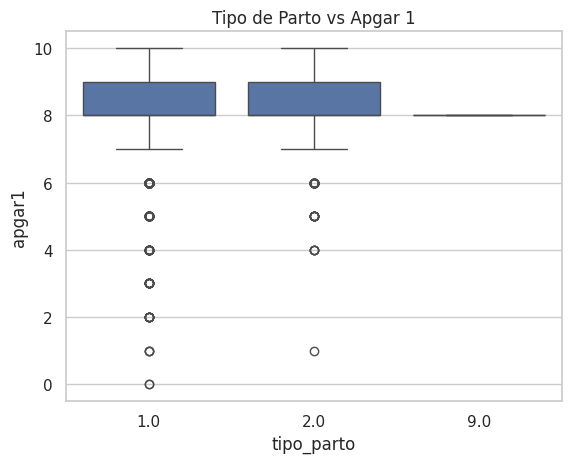

In [ ]:
sns.boxplot(x='tipo_parto', y='peso', data=df_itapaje)
plt.title('Tipo de Parto vs Peso ao Nascer')
plt.show()

sns.boxplot(x='tipo_parto', y='apgar1', data=df_itapaje)
plt.title('Tipo de Parto vs Apgar 1')
plt.show()


In [ ]:
import statsmodels.api as sm

# Definir variáveis independentes (X) e dependentes (y)
X = df_itapaje[['idade_mae', 'gestacoes_ant', 'apgar1', 'apgar5']]  # Adicione as variáveis independentes desejadas
X = sm.add_constant(X)  # Adiciona uma constante para o intercepto
y = df_itapaje['peso']

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Estatísticas descritivas das variáveis numéricas
print(df_itapaje[['idade_mae', 'gestacoes_ant', 'peso', 'apgar1', 'apgar5']].describe())


       idade_mae  gestacoes_ant         peso    apgar1    apgar5
count     5762.0         5762.0       5762.0    5762.0    5762.0
mean   25.900729       1.265533  3315.777681  8.142485   9.71312
std      6.59208       1.476879    465.20775   0.90573  0.688234
min         13.0            0.0        635.0       0.0       0.0
25%         21.0            0.0       3030.0       8.0      10.0
50%         25.0            1.0       3300.0       8.0      10.0
75%         31.0            2.0       3610.0       9.0      10.0
max         47.0           13.0       5500.0      10.0      10.0


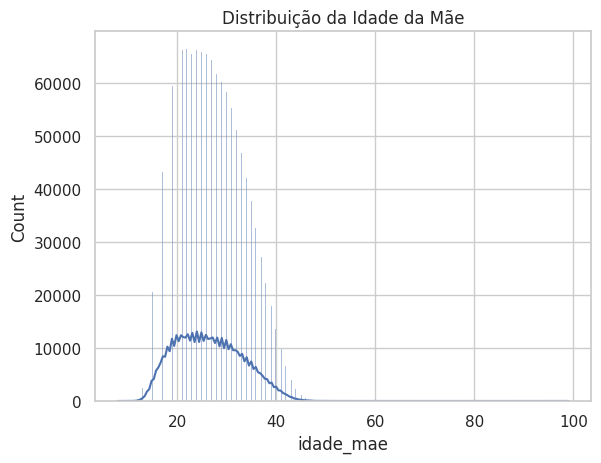

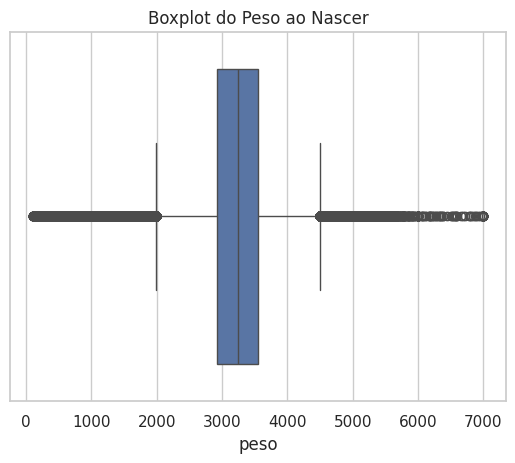

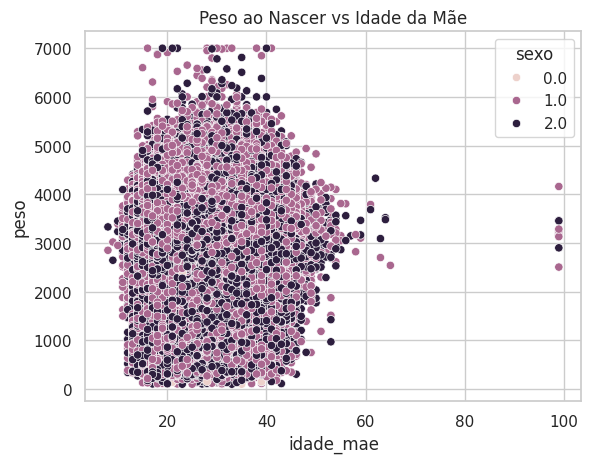

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
sns.histplot(df['idade_mae'], kde=True)
plt.title('Distribuição da Idade da Mãe')
plt.show()

# Boxplot
sns.boxplot(x='peso', data=df)
plt.title('Boxplot do Peso ao Nascer')
plt.show()

# Scatterplot
sns.scatterplot(x='idade_mae', y='peso', hue='sexo', data=df)
plt.title('Peso ao Nascer vs Idade da Mãe')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


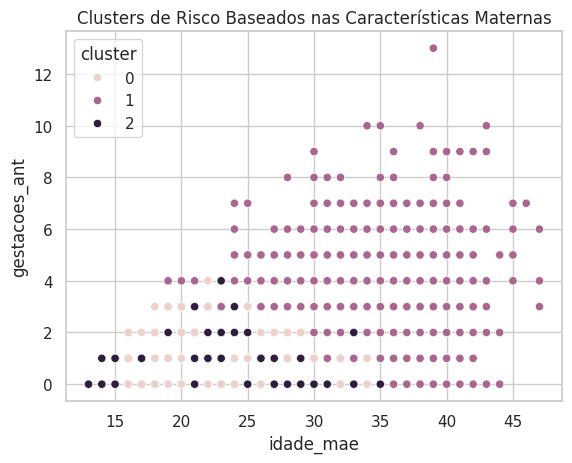

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecionar e escalar características para clustering
features = df_itapaje[['idade_mae', 'gestacoes_ant', 'peso']]
features_scaled = StandardScaler().fit_transform(features)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_itapaje['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar os clusters
sns.scatterplot(x='idade_mae', y='gestacoes_ant', hue='cluster', data=df_itapaje)
plt.title('Clusters de Risco Baseados nas Características Maternas')
plt.show()


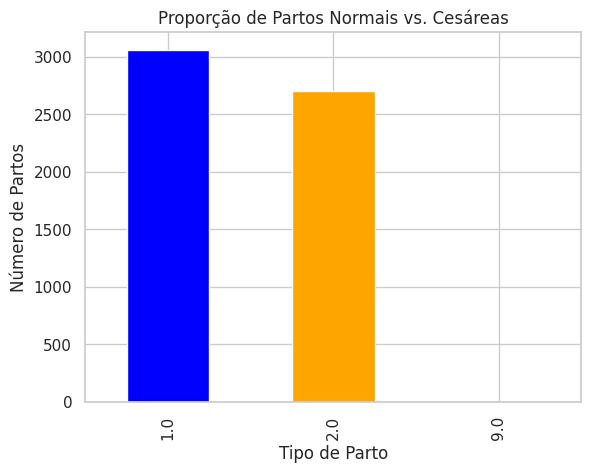

In [ ]:
import matplotlib.pyplot as plt

# Proporção de partos normais vs cesáreas
partos_tipo = df_itapaje['tipo_parto'].value_counts()
partos_tipo.plot(kind='bar', color=['blue', 'orange'])
plt.title('Proporção de Partos Normais vs. Cesáreas')
plt.xlabel('Tipo de Parto')
plt.ylabel('Número de Partos')
plt.show()


In [ ]:
# Percentual de gestantes com pré-natal
pre_natal_count = df_itapaje['pre_natal'].notnull().sum()
total_gestantes = df_itapaje.shape[0]
percentual_pre_natal = (pre_natal_count / total_gestantes) * 100

print(f'Percentual de gestantes que realizaram o pré-natal: {percentual_pre_natal:.2f}%')

# Número médio de consultas pré-natais
media_consultas = df_itapaje['pre_natal'].mean()
print(f'Número médio de consultas pré-natais: {media_consultas:.2f}')


Percentual de gestantes que realizaram o pré-natal: 89.19%
Número médio de consultas pré-natais: 7.68


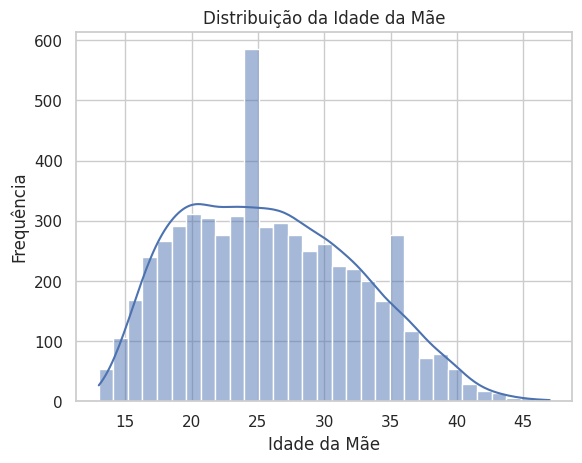

count       5762.0
mean     25.900729
std        6.59208
min           13.0
25%           21.0
50%           25.0
75%           31.0
max           47.0
Name: idade_mae, dtype: Float64


In [ ]:
# Distribuição da idade das mães
sns.histplot(df_itapaje['idade_mae'], kde=True)
plt.title('Distribuição da Idade da Mãe')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.show()

# Estatísticas descritivas da idade das mães
print(df_itapaje['idade_mae'].describe())


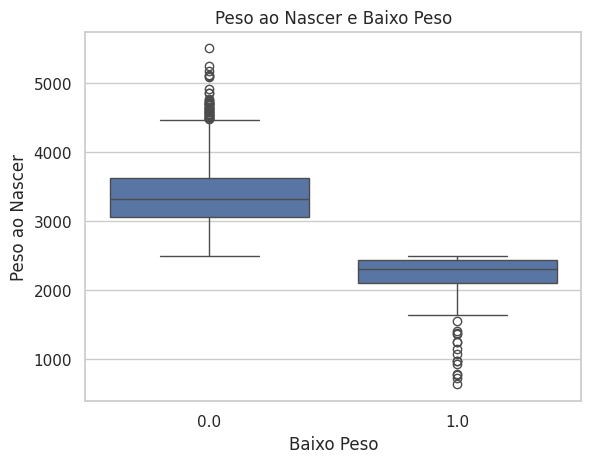

TypeError: boolean value of NA is ambiguous

In [ ]:
# Análise de fatores de risco (exemplo: baixo peso ao nascer e parto prematuro)
sns.boxplot(x='baixo_peso', y='peso', data=df_itapaje)
plt.title('Peso ao Nascer e Baixo Peso')
plt.xlabel('Baixo Peso')
plt.ylabel('Peso ao Nascer')
plt.show()

sns.boxplot(x='pretermo', y='peso', data=df_itapaje)
plt.title('Peso ao Nascer e Parto Prematuro')
plt.xlabel('Parto Prematuro')
plt.ylabel('Peso ao Nascer')
plt.show()


In [ ]:
# Verificar valores ausentes na coluna 'risco_gestacional'
print(df['risco_gestacional'].isnull().sum())


228507


In [ ]:
import pandas as pd

# Substituir valores <NA> por False
df['risco_gestacional'].fillna(False, inplace=True)


In [ ]:
# Remover linhas com valores ausentes na coluna 'risco_gestacional'
df= df.dropna(subset=['risco_gestacional'])



In [ ]:
# Reavaliar a criação da coluna de risco gestacional
df['risco_gestacional'] = (df['idade_mae'] > 35) | (df['gestacoes_ant'] > 2) | (df['pre_natal'] < 4)


In [ ]:
# Preencher valores ausentes em 'pre_natal'
df['pre_natal'].fillna(0, inplace=True)  # Ou outro valor apropriado


In [ ]:
# Garantir que 'risco_gestacional' é booleano
df['risco_gestacional']


,risco_gestacional
0,True
1,False
2,False
3,False
4,False
...,...
1296568,<NA>
1296569,<NA>
1296570,<NA>
1296571,<NA>


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o boxplot
sns.boxplot(x='risco_gestacional', y='peso', data=df)
plt.title('Peso ao Nascer em Gestações de Risco')
plt.xlabel('Risco Gestacional')
plt.ylabel('Peso ao Nascer')
plt.show()


ValueError: Could not interpret value `risco_gestacional` for `x`. An entry with this name does not appear in `data`.